<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Lasso_%26_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso regression is used in the cost function, it removes less important features. It prevents overfitting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("Advertising.csv")

In [3]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# remove unnamed data

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

# investigate relationship between every variable with target(sales)

Text(0, 0.5, 'Sales')

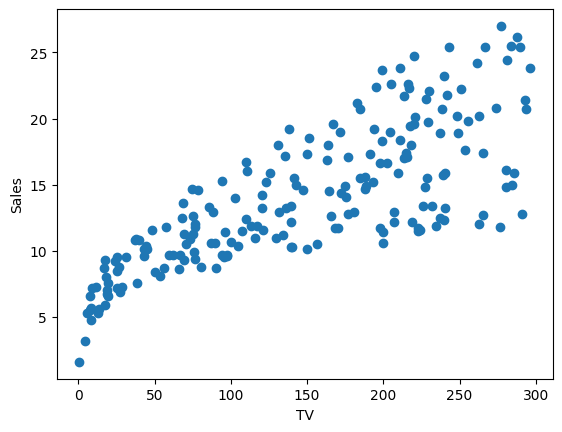

In [12]:
plt.scatter(df.TV, df.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")


Text(0, 0.5, 'Sales')

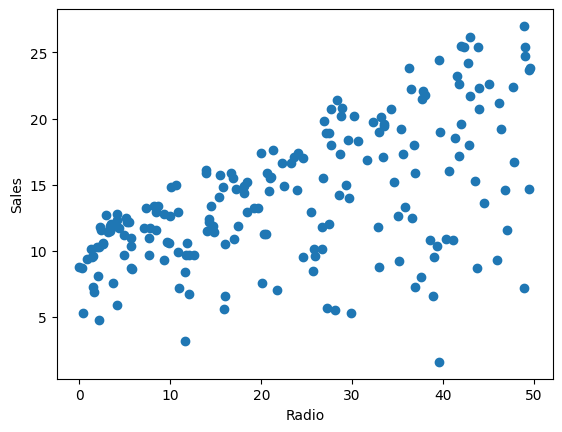

In [13]:
plt.scatter(df.Radio, df.Sales)
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

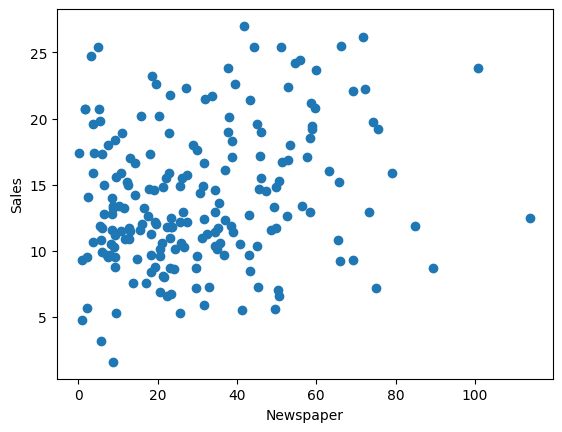

In [15]:
plt.scatter(df.Newspaper, df.Sales)
plt.xlabel("Newspaper")
plt.ylabel("Sales")

# Run Multiple linear Regression model

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
x = df.drop(["Sales"], axis=1)
y = df["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, x, y, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.0729465971002106


#  use GridSearchCV model provided by Scikit-learn,to find the optimal value of alpha

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [19]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


# Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+02, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+02, tolerance: 4.503e-01
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-3.041405896751369


In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(x, y)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 1}
Best Score: 0.8882007416256036


# Run Lasso with train and test data

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test)

# Model Score
print("Model Score: ", lasso.score(X_test, y_test))

# Lasso Coefficient
lasso.coef_

Model Score:  0.8646258647835885


array([3.59030605, 2.83747278, 0.06852482])